# Project Milestone II: Data Preprocessing

### Project Objective

At the center of all diamond busines models is the worth and quality of diamonds and how clients, end users, and distributors perceive the genuine valuation of these stones. There is a critical business need to be able to legitimately price these diamonds in order to satisfy their high estimations and expectations.  

Our project objective is to use descriptive analytics to explore and understand the caveats of the various characteristics of diamonds that impact its value and distinguish which ones either increase its prices or are less determinant to their worth. We also want to develop, build, and test a predictive model where we are able to accurately predict diamond prices by using its characteristics. 

### Method of Analysis

For our method of analysis, we will first conduct a thorough and sophiscated descriptive analytics process using charts and visualizations from aggregating our data. Then we will utilize both Linear Regression and Gradient Boosted Trees to construct our models that we will fit, test, evaluate, and adjust to get the best accuracy. 

### Dataset Description

**carat**: A carat is a unit of measurement used to specify the weight of a diamond. 'Carat' is a diamond industry special word for the weight of a diamond stone. One carat is equal to 200 milligrams (dtype: float64) <br>
**cut**: The quality of the cut of the diamond measured as being Fair, Good, Very Good, Premium, and Ideal (dtype: object) <br>
**color**: The color of the diamond randing from J which is the worst to D, which is the best (dtype: object) <br>
**clarity**: The measure of how clear the diamond is which from worst to best measures as I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (dtype: object) <br>
**table**: The width of the top of the diamond relative to the widest point, measured in mm (dtype: float64) <br>
**price** The price of the diamond, measured in US Dollars (dtype: int64) <br>
**x**: The length of the diamond, measured in mm (dtype: float64) <br>
**y**: The width of the diamond, measured in mm (dtype: float64) <br>
**z**: The depth of the diamond, measured in mm (dtype: float64) <br>
**depth**: The total depth of the diamond which is calculated as percentage = z / mean(x, y) = 2 * z / (x + y) (dtype: float64) <br><br>
Our dependent variable is price and our dependent variables are all the other characteristics of the diamond.

## Importing Packages

Here we will install our visualization packages to use for histograms, bar charts, and scatterplots

In [1]:
%%local
!emr/notebook-env/bin/pip install bokeh
!emr/notebook-env/bin/pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


We see that the packages were successfully installed. We need to restart the kernal to continue.

Here we import pyspark and pyspark sql to start the spark application to use for our notebook.

In [2]:
from pyspark.sql.functions import col,sum
from pyspark import SparkContext
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1616723013212_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We see that the Spark application was sucessfully started and we can use Spark now.

## Loading Data

We load our dataset from our s3 bucket into a dataframe.

In [3]:
diamonds_df = (
    spark.read.csv('s3://samuell-cis4567/Spark/diamonds/diamonds.csv', 
    header=True, 
    inferSchema=True))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We have successfully loaded our data into Pyspark dataframe. We will use this dataframe for our cleansing before analysis.

## Cleaning Data

### Checking and Removing Duplicates

In the following code, we want to check our dataset to see we have duplicate rows. Duplicate rows would be an issue and would result in us taking action to remove it. We do this by comparing the total count of all records and compare it with the distinct records in the dataset.

In [5]:
diamonds_df.count(), diamonds_df.distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

(53940, 53940)

From the output, we see that there are no duplicate records as the counts are the same. So we do not have to take action to remove any duplicated records.

### Checking and Removing Missing Values

We run the following code to see if there are any missing values in any of our rows within our columns of our dataset. 

In [6]:
diamonds_df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in diamonds_df.columns)).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|_c0|carat|cut|color|clarity|depth|table|price|  x|  y|  z|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+
|  0|    0|  0|    0|      0|    0|    0|    0|  0|  0|  0|
+---+-----+---+-----+-------+-----+-----+-----+---+---+---+

From the output, we see that there are no missing values. So, we do need to take action to clean our dataset to accomodate any rows that have missing values. 

## Generate Descriptive Statistics

We run the following code to illustrate descriptive statistics of our dataset's numeric features and use it to interpret any insights that can be of use for us for better understanding our data and discovering any route of action we can take for further analysis.

In [8]:
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
descriptive_stats = diamonds_df.describe(features)
descriptive_stats.show(truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0---------------------
 summary | count              
 carat   | 53940              
 depth   | 53940              
 table   | 53940              
 price   | 53940              
 x       | 53940              
 y       | 53940              
 z       | 53940              
-RECORD 1---------------------
 summary | mean               
 carat   | 0.7979397478679852 
 depth   | 61.74940489432624  
 table   | 57.45718390804603  
 price   | 3932.799721913237  
 x       | 5.731157211716609  
 y       | 5.734525954764462  
 z       | 3.5387337782723316 
-RECORD 2---------------------
 summary | stddev             
 carat   | 0.4740112444054196 
 depth   | 1.4326213188336525 
 table   | 2.2344905628213247 
 price   | 3989.439738146397  
 x       | 1.1217607467924915 
 y       | 1.1421346741235616 
 z       | 0.7056988469499883 
-RECORD 3---------------------
 summary | min                
 carat   | 0.2                
 depth   | 43.0               
 table   | 43.0               
 price  

From running descriptive statistics, we can see the count, mean, standard deviation, min, and max values of each of our variables. This allows us to summarize our dataset and have a better understanding of our data.

## Data Visualization

### Carat Histogram

We run the following code to create our carat histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.

In [9]:
#generate bins and count of each bin
histogram_carat = (
    diamonds_df
    .select('carat')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [10]:
%%spark -o hist_carat

import pandas as pd
hist_carat =  spark.createDataFrame(
    list(zip(*histogram_carat)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [11]:
%%local

from bokeh.io import show
from bokeh.plotting import figure
from bokeh.io import output_notebook

output_notebook()
labels = [str(round(e, 2)) for e in hist_carat['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Carat Hist'
)
p.vbar(x=labels, top=hist_carat['counts'], width=0.9)
show(p)

Loading BokehJS ...

From the output, we can see our histogram of carat values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### Depth Histogram

We run the following code to create our depth histogram's cut-off points. We first select the column we would like to 
visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. 
Then we call the histogram method of RDD and provide the number of partitions.

In [12]:
#generate bins and count of each bin
histogram_depth = (
    diamonds_df
    .select('depth')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [13]:
%%spark -o hist_depth

import pandas as pd
hist_depth =  spark.createDataFrame(
    list(zip(*histogram_depth)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [14]:
%%local

labels = [str(round(e, 2)) for e in hist_depth['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Depth'
)
p.vbar(x=labels, top=hist_depth['counts'], width=0.9)
show(p)

From the output, we can see our histogram of depth values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### Table Histogram

We run the following code to create our table histogram's cut-off points. We first select the column we would like to 
visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. 
Then we call the histogram method of RDD and provide the number of partitions.

In [15]:
#generate bins and count of each bin
histogram_table = (
    diamonds_df
    .select('table')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [16]:
%%spark -o hist_table

import pandas as pd
hist_table =  spark.createDataFrame(
    list(zip(*histogram_table)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [17]:
%%local

labels = [str(round(e, 2)) for e in hist_table['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Table'
)
p.vbar(x=labels, top=hist_table['counts'], width=0.9)
show(p)

From the output, we can see our histogram of table values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### Price Histogram

We run the following code to create our price histogram's cut-off points. We first select the column we would like to 
visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. 
Then we call the histogram method of RDD and provide the number of partitions.

In [18]:
#generate bins and count of each bin
histogram_price = (
    diamonds_df
    .select('price')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [19]:
%%spark -o hist_price

import pandas as pd
hist_price =  spark.createDataFrame(
    list(zip(*histogram_price)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [20]:
%%local

labels = [str(round(e, 2)) for e in hist_price['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Price'
)
p.vbar(x=labels, top=hist_price['counts'], width=0.9)
show(p)

From the output, we can see our histogram of price values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### X Histogram

We run the following code to create our X histogram's cut-off points. We first select the column we would like to 
visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. 
Then we call the histogram method of RDD and provide the number of partitions.

In [21]:
#generate bins and count of each bin
histogram_x = (
    diamonds_df
    .select('x')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [22]:
%%spark -o hist_x

import pandas as pd
hist_x =  spark.createDataFrame(
    list(zip(*histogram_x)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [23]:
%%local

labels = [str(round(e, 2)) for e in hist_x['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist X'
)
p.vbar(x=labels, top=hist_x['counts'], width=0.9)
show(p)

From the output, we can see our histogram of X values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### Y Histogram

We run the following code to create our Y histogram's cut-off points. We first select the column we would like to 
visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. 
Then we call the histogram method of RDD and provide the number of partitions.

In [24]:
#generate bins and count of each bin
histogram_y = (
    diamonds_df
    .select('y')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [25]:
%%spark -o hist_y

import pandas as pd
hist_y =  spark.createDataFrame(
    list(zip(*histogram_y)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [26]:
%%local

labels = [str(round(e, 2)) for e in hist_y['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Y'
)
p.vbar(x=labels, top=hist_y['counts'], width=0.9)
show(p)

From the output, we can see our histogram of Y values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### Z Histogram

We run the following code to create our Z histogram's cut-off points. We first select the column we would like to 
visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. 
Then we call the histogram method of RDD and provide the number of partitions.

In [ ]:
#generate bins and count of each bin
histogram_z = (
    diamonds_df
    .select('z')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 

In [ ]:
%%spark -o hist_z

import pandas as pd
hist_z =  spark.createDataFrame(
    list(zip(*histogram_z)), 
    ['bins', 'counts'])

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_z['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Z'
)
p.vbar(x=labels, top=hist_z['counts'], width=0.9)
show(p)

From the output, we can see our histogram of Z values. We also acknowledge that there are outliers that exist, which we will attend to and possibly remove later on when we conduct outlier analysis. 

### Cut Bar Graph

Using Spark cell magic, we send the dataframe to the client. We then group column "cut" by its count in each type of cut and sort by descending order. 

In [ ]:
%%spark -o df_cut 
df_cut = diamonds_df.groupby("cut").count().sort(col("count").desc())

In [ ]:
df_cut

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+-----+
|      cut|count|
+---------+-----+
|    Ideal|21551|
|  Premium|13791|
|Very Good|12082|
|     Good| 4906|
|     Fair| 1610|
+---------+-----+

From the output, we can see our dataframe of count per type of cut in descending order.

First, we make our plot output appear and be stored within the notebook. We then import matplotlib to create our bar chart.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df_cut

Output()

From the output we can see our bar chart of cut.

### Color Bar Chart

Using Spark cell magic, we send the dataframe to the client. We then group column "color" by its count in each type of color and sort by descending order. 

In [ ]:
%%spark -o df_color 
df_color = diamonds_df.groupby("color").count().sort(col("count").desc())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

First, we make our plot output appear and be stored within the notebook. We then import matplotlib to create our bar chart.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df_color

Output()

From the output we can see our bar chart of color.

### Clarity Bar Chart

Using Spark cell magic, we send the dataframe to the client. We then group column "clarity" by its count in each type of clarity and sort by descending order. 

In [ ]:
%%spark -o df_clarity 
df_clarity = diamonds_df.groupby("clarity").count().sort(col("count").desc())

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

First, we make our plot output appear and be stored within the notebook. We then import matplotlib to create our bar chart.

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
df_clarity

Output()

From the output we can see our bar chart of clarity.

### Scatterplot #1

We export this dataframe to the client that contains columns "carat" and "price" using Spark magic. The Spark magic will not export the entire dataframe because it may be too large. By default, it will take a sample of 2,500 records.

In [ ]:
%%spark -o scatter

scatter = (
    diamonds_df
    .select('carat', 'price')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Run locally, we receive a pandas dataframe by the same name of "scatter".

First, we make our plot output appear and be stored within the notebook. We then import matplotlib to create our bar chart. Next, we provide the variables we want to be scattered, provide labels, and location of the legend.

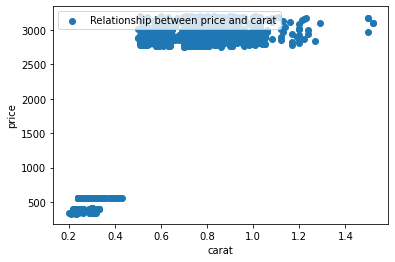

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter( list(scatter['carat'])
         , list(scatter['price']), 
            label="Relationship between price and carat")
plt.xlabel("carat")
plt.ylabel("price")
plt.legend(loc='upper left')
plt.show()

From the output we can see our scatter plot of the relationship between price and carat. As carat increases, price remains relatively the same.

### Scatterplot #2

We export this dataframe to the client that contains columns "price" and "depth" using Spark magic. The Spark magic will not export the entire dataframe because it may be too large. By default, it will take a sample of 2,500 records.

In [ ]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    diamonds_df
    .select('price', 'depth')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Run locally, we receive a pandas dataframe by the same name of "scatter".

First, we make our plot output appear and be stored within the notebook. We then import matplotlib to create our bar chart. Next, we provide the variables we want to be scattered, provide labels, and location of the legend.

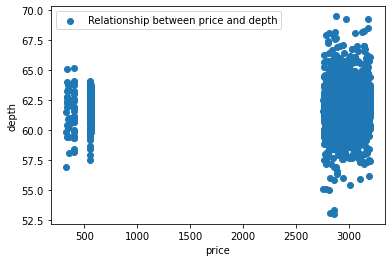

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter( list(scatter['price'])
         , list(scatter['depth']), 
            label="Relationship between price and depth")
plt.xlabel("price")
plt.ylabel("depth")
plt.legend(loc='upper left')
plt.show()

From the output we can see our scatter plot of the relationship between price and depth. As depth increases, price remains relatively the same.

### Scatterplot #3

We export this dataframe to the client that contains columns "table" and "depth" using Spark magic. The Spark magic will not export the entire dataframe because it may be too large. By default, it will take a sample of 2,500 records.

In [ ]:
%%spark -o scatter
#spark magic moves dataframe to local
#By default it gets a sample of 2500 but you can change it
scatter = (
    diamonds_df
    .select('table', 'depth')
)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Run locally, we receive a pandas dataframe by the same name of "scatter".

First, we make our plot output appear and be stored within the notebook. We then import matplotlib to create our bar chart. Next, we provide the variables we want to be scattered, provide labels, and location of the legend.

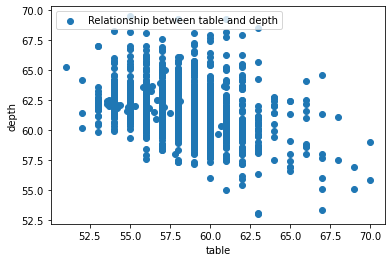

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter( list(scatter['table'])
         , list(scatter['depth']), 
            label="Relationship between table and depth")
plt.xlabel("table")
plt.ylabel("depth")
plt.legend(loc='upper left')
plt.show()

From the output we can see our scatter plot of the relationship between table and depth. As table increases, depth appears to slightly decrease.

## Outlier Analysis

### Carat Column

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the carat histogram. We see that there are outliers that are greater than the value 2.6. We want to filter on our dataframe to values less than 2.6, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.carat < 2.6)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

### Depth Column 

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the depth histogram. We see that there are outliers that are less than the value 50.2. We want to filter on our dataframe to values greater than 50.2, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.depth > 50.2)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the depth histogram. We see that there are outliers that are greater than the value 71.8. We want to filter on our dataframe to values less than 71.8, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.depth < 71.8)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

### Table Column

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the table histogram. We see that there are outliers that are less than the value 49. We want to filter on our dataframe to values greater than 49, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.table > 49)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the table histogram. We see that there are outliers that are greater than the value 70. We want to filter on our dataframe to values less than 70, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.table < 70)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

### Z Column

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the z histogram. We see that there are outliers that are less than or equal to the value 0. We want to filter on our dataframe to values greater than 0, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.z > 0)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the z histogram. We see that there are outliers that are greater than the value 6.36. We want to filter on our dataframe to values less than 6.36, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.z < 6.36)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

### Y Column

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the y histogram. We see that there are outliers that are less than or equal to the value 0. We want to filter on our dataframe to values greater than 0, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.y > 0)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the y histogram. We see that there are outliers that are greater than the value 10. We want to filter on our dataframe to values less than 10, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.y < 10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

### X Column

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the x histogram. We see that there are outliers that are less than or equal to the value 0. We want to filter on our dataframe to values greater than 0, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.x > 0)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

We begin cleansing our data by removing outliers. We do this by observing the visualization we made via the x histogram. We see that there are outliers that are greater than the value 8.5. We want to filter on our dataframe to values less than 8.5, where most of our data is found for this column. 

In [ ]:
diamonds_df = (
    diamonds_df
    .filter(diamonds_df.x < 8.5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

By reassigning this filtered dataframe to our diamonds_df, this new dataframe will represent the filter we had previously specified. 

After finalizing outlier analysis, we want to see that only 3% of our data has been removed. We take the count of our data to see how much data remains. 

In [ ]:
diamonds_df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

53602

We see that we have correctly done outlier removal as we see that (53602/53940) 99% of our data still remains. 

## Descriptive Statistics

We run the following code to illustrate descriptive statistics of our dataset's numeric features after removing outliers from our numeric features. This descriptive stats on cleaner data should provide much clearer insights about our numeric data, enabling us to identify areas of action.

In [ ]:
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
descriptive_stats = diamonds_df.describe(features)
descriptive_stats.show(truncate=False, vertical=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

-RECORD 0----------------------
 summary | count               
 carat   | 53602               
 depth   | 53602               
 table   | 53602               
 price   | 53602               
 x       | 53602               
 y       | 53602               
 z       | 53602               
-RECORD 1----------------------
 summary | mean                
 carat   | 0.788308645199771   
 depth   | 61.751108167604926  
 table   | 57.44791798813481   
 price   | 3870.1357412036864  
 x       | 5.715253908436141   
 y       | 5.717419126151925   
 z       | 3.5294959143317146  
-RECORD 2----------------------
 summary | stddev              
 carat   | 0.45663821744238736 
 depth   | 1.4103371707317103  
 table   | 2.2100870692758483  
 price   | 3903.857262573186   
 x       | 1.0998942760156962  
 y       | 1.0924032627090225  
 z       | 0.6800423730484303  
-RECORD 3----------------------
 summary | min                 
 carat   | 0.2                 
 depth   | 50.8                
 table  

From running descriptive statistics, we can see the count, mean, standard deviation, min, and max values of each of our variables. This allows us to summarize our dataset and have a better understanding of our data. We notice that the min and max for our x, y and x features don't have zeros as this makes better sense of our diamonds dimensions.

## Carat Histogram

We run the following code to create our carat histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.

In [ ]:
#generate bins and count of each bin
histogram_carat = (
    diamonds_df
    .select('carat')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.


We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_carat

import pandas as pd
hist_carat =  spark.createDataFrame(
    list(zip(*histogram_carat)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 


In [ ]:
%%local

output_notebook()
labels = [str(round(e, 2)) for e in hist_carat['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Carat Hist'
)
p.vbar(x=labels, top=hist_carat['counts'], width=0.9)
show(p)

Loading BokehJS ...

From the output, we can see our histogram of carat values. We see the distribution of our data does not have any outliers.

## Depth Histogram

We run the following code to create our depth histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.

In [ ]:
#generate bins and count of each bin
histogram_depth = (
    diamonds_df
    .select('depth')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_depth

import pandas as pd
hist_depth =  spark.createDataFrame(
    list(zip(*histogram_depth)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 

In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_depth['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Depth'
)
p.vbar(x=labels, top=hist_depth['counts'], width=0.9)
show(p)

From the output, we can see our histogram of depth values. We see the distribution of our data does not have any outliers despite the low value of counts for the rest of the data in this column.

## Table Histogram

We run the following code to create our table histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.

In [ ]:
#generate bins and count of each bin
histogram_table = (
    diamonds_df
    .select('table')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.


We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_table

import pandas as pd
hist_table =  spark.createDataFrame(
    list(zip(*histogram_table)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 


In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_table['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Table'
)
p.vbar(x=labels, top=hist_table['counts'], width=0.9)
show(p)

From the output, we can see our histogram of table values. We see the distribution of our data does not have any outliers.

## Price Histogram

We run the following code to create our price histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.


In [ ]:
#generate bins and count of each bin
histogram_price = (
    diamonds_df
    .select('price')
    .rdd
    .flatMap(lambda record: record)
    .histogram(10)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.


We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_price

import pandas as pd
hist_price =  spark.createDataFrame(
    list(zip(*histogram_price)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 


In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_price['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Price'
)
p.vbar(x=labels, top=hist_price['counts'], width=0.9)
show(p)

From the output, we can see our histogram of price values. We see the distribution of our data does not have any outliers.

## X Histogram

We run the following code to create our x histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.


In [ ]:
#generate bins and count of each bin
histogram_x = (
    diamonds_df
    .select('x')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.

We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_x

import pandas as pd
hist_x =  spark.createDataFrame(
    list(zip(*histogram_x)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 


In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_x['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist X'
)
p.vbar(x=labels, top=hist_x['counts'], width=0.9)
show(p)

From the output, we can see our histogram of x values. We see the distribution of our data does not have any outliers.

## Y Histogram

We run the following code to create our y histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.


In [ ]:
#generate bins and count of each bin
histogram_y = (
    diamonds_df
    .select('y')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.


We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_y

import pandas as pd
hist_y =  spark.createDataFrame(
    list(zip(*histogram_y)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 


In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_y['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Y'
)
p.vbar(x=labels, top=hist_y['counts'], width=0.9)
show(p)

From the output, we can see our histogram of y values. We see the distribution of our data does not have any outliers.

## Z Histogram

We run the following code to create our z histogram's cut-off points. We first select the column we would like to visualize and convert it to an RDD level. We then flat map the column to flatten out all elements. Then we call the histogram method of RDD and provide the number of partitions.


In [ ]:
#generate bins and count of each bin
histogram_z = (
    diamonds_df
    .select('z')
    .rdd
    .flatMap(lambda record: record)
    .histogram(5)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

This cell does not generate the histogram. Its purpose is to generate the cut-off points for our histogram.


We use cell magic to export our converted pandas dataframe to the client. We do this in order to have our bins and frequencies in two separate columns. 


In [ ]:
%%spark -o hist_z

import pandas as pd
hist_z =  spark.createDataFrame(
    list(zip(*histogram_z)), 
    ['bins', 'counts'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We first tell Jupyter that this is a local cell and to not send it to the cluster. We then import libraries from bokeh. We then set the parameters for our histogram and create it. We set bins as our index and we use counts for our heights. 


In [ ]:
%%local

labels = [str(round(e, 2)) for e in hist_z['bins']]
p = figure(
 x_range=labels,
 plot_height=350,
 title='Hist Z'
)
p.vbar(x=labels, top=hist_z['counts'], width=0.9)
show(p)

From the output, we can see our histogram of z values. We see the distribution of our data does not have any outliers.